In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# Diabetes dataset is also directly available in keras library
df=pd.read_csv(r'C:\Users\DELL\Downloads\archive\diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
x=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [4]:
# One hot encoding of label variable (Note-it is not required for binary classification but for multiclass. Ijust did it for practice and experimentation.)
from keras.utils import to_categorical
import numpy as np
temp=[]
for i in range(len(y)):
               temp.append(to_categorical(y[i], num_classes=2))
y = np.array(temp)

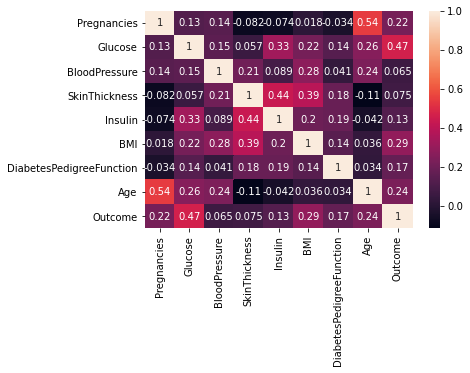

In [5]:
# Correlation Matrix used for knowing relation between features and label and to check if there is any collinearity among features
import seaborn as sns
sns.heatmap(df.corr(), annot = True)

 we can see features like Glucose, Age and BMI contribute more than others.

We cannot see much of collinearity in data apart from pregnancy and age we are trying to ignore this for some time right now but you can try to remove collinearity and try performing again.

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

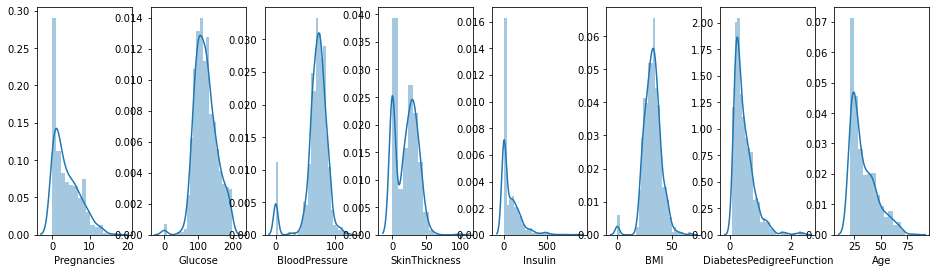

In [7]:
#plot to check distribution of each 
import matplotlib.pyplot as plt
x_train
number_of_columns=8
l=x_train.columns.values
number_of_rows=len(l)-1/number_of_columns

plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(x_train[l[i]],kde=True)

 As you can see features like Bloodpressure, Glucose, BMI are having normal distribution (some entries of there features are showing zero but lets consider those as inconsistent as values for those features cannot be zero for actual human case so those are because of human error). (Note-You can try deleting these tuples to make data more consistent and again try to fit algorithm results will be better.) Ohter features do not follow gaussian distribution so we will use standerdization.

In [8]:
x_train.shape[0]
print(l)

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']


In [9]:
# Normalization or standerdization is done for feature scling.
# As KNN does not require features in guassian form we used standerdization (mean=0, standerd deviation=1) otherwise you can do normalization(all values between 0 to 1)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [11]:
x_train

array([[ 0.90832902,  0.91569367,  0.44912368, ...,  0.37852648,
         0.67740401,  1.69955804],
       [ 0.03644676, -0.75182191, -0.47230103, ..., -0.50667229,
        -0.07049698, -0.96569189],
       [-1.12606292,  1.38763205,  1.06340683, ...,  2.54094063,
        -0.11855487, -0.88240283],
       ...,
       [ 0.03644676, -0.84620959, -0.21634972, ..., -0.94927168,
        -0.95656442, -1.04898095],
       [ 2.0708387 , -1.12937261,  0.24436264, ..., -0.26640405,
        -0.50001442,  0.11706589],
       [ 0.32707418,  0.47521786,  0.65388473, ..., -4.07275877,
         0.52121586,  2.94889395]])

In [12]:
#Model initialization
model=Sequential()
# You can change number of neurons and activation function according to whichever gave you optimal result(not applicable for output layer.
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
# In output as I have encoded thats why used 2 neurons otherwise one neuron is sufficient and use softmax for multiclass classification and number of neurons according to number of classes.
model.add(Dense(2, activation='sigmoid'))

In [13]:
# For classification loss function is cross entropy whether it is multiclass or binary.
# Optimizer and metrics convinient to you (you can experiment here as well.)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [14]:
# Model training and validation(as there is no validation set i have used test set for validation as well but you can againg split data into validation and training.)
model.fit(x_train, y_train, epochs=15, batch_size=30,validation_data=(x_test,y_test))


Epoch 1/15
21/21 [==============================] - 0s 22ms/step - loss: 0.6635 - accuracy: 0.6368 - val_loss: 0.6370 - val_accuracy: 0.6753
Epoch 2/15
21/21 [==============================] - 0s 3ms/step - loss: 0.6448 - accuracy: 0.6417 - val_loss: 0.6157 - val_accuracy: 0.6883
Epoch 3/15
21/21 [==============================] - 0s 3ms/step - loss: 0.6288 - accuracy: 0.6466 - val_loss: 0.5981 - val_accuracy: 0.6948
Epoch 4/15
21/21 [==============================] - 0s 3ms/step - loss: 0.6154 - accuracy: 0.6515 - val_loss: 0.5813 - val_accuracy: 0.7078
Epoch 5/15
21/21 [==============================] - 0s 3ms/step - loss: 0.6020 - accuracy: 0.6596 - val_loss: 0.5670 - val_accuracy: 0.7338
Epoch 6/15
21/21 [==============================] - 0s 3ms/step - loss: 0.5894 - accuracy: 0.6678 - val_loss: 0.5528 - val_accuracy: 0.7403
Epoch 7/15
21/21 [==============================] - 0s 3ms/step - loss: 0.5787 - accuracy: 0.6710 - val_loss: 0.5382 - val_accuracy: 0.7532
Epoch 8/15
21/21 [=

we can see accuracy settles more or less at 75%. 
You can always try different combination of neurons and activation function ( might get better results)

In [24]:
predictions = model.predict(x_test)
pred=np.argmax(predictions,axis=1)
pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [26]:
y_test=np.argmax(y_test,axis=1)
y_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       107
           1       0.61      0.60      0.60        47

    accuracy                           0.76       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.76      0.76      0.76       154



Here we can see precision by each output (in this case 0 and 1). 
We can say that our model is more precise for 0 which in this case is no diabetes than 1 i.e. Diabetes patient.
So there is scope of improvement (I'll try to make improvements but you can always try somethings that I have mentioned that might get better results)